# Imports

In [11]:
import pandas as pd

from transformers import GPT2Tokenizer, GPT2LMHeadModel, TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments
from datasets import load_dataset

In [12]:
teleo_test = pd.read_csv("Data/TeleoSplit/test.csv")
teleo_train = pd.read_csv("Data/TeleoSplit/train.csv")
teleo_val = pd.read_csv("Data/TeleoSplit/val.csv")
teleo=pd.concat([teleo_test,teleo_train,teleo_val])

In [13]:
print(teleo_test['family'].nunique())
print(teleo_train['family'].nunique())
print(teleo_val['family'].nunique())

317
378
222


In [14]:
teleo.drop_duplicates(subset='family', keep='first', inplace=True)


# Create tokenizer

In [15]:
token_list = []
token_list.extend(teleo['phylum'].unique())
token_list.extend(teleo['class'].unique())
token_list.extend(teleo['order'].unique())
token_list.extend(teleo['family'].unique())


In [24]:
teleo

,sequence,phylum,class,order,family,genus,species
0,CCCCAAGCAACTGGACCTAAATTTTTCTTTAAACCCTAACAATCGC...,Chordata,Actinopteri,Carangiformes,Carangidae,Megalaspis,Megalaspiscordyla
1,CCCTATCTACAGTGTAAATTAATACTTAATACCTTAACACAGATAA...,Chordata,Actinopteri,Cypriniformes,Cyprinidae,Osteobrama,Osteobramabelangeri
2,CCCCAAGTTTAATTTATCCTTCTAACTAAGAAGTTAACCAAACAAA...,Chordata,Actinopteri,Salmoniformes,Salmonidae,Salvelinus,Salvelinuscurilus
3,CCCCAAGCACCCTCGAAATAACCTAAATAAAACATAAGAAAAGCAT...,Chordata,Actinopteri,Spariformes,Nemipteridae,Nemipterus,Nemipterusrandalli
4,CCTCAACTTAAACCACTCATTTTATAAATAACTTTTTATCTCAAGA...,Chordata,Chondrichthyes,Rajiformes,Rajidae,Beringraja,Beringrajapulchra
...,...,...,...,...,...,...,...
10887,CCCTAACCCCTGTAACCTTAAATAACTAATTACATTTTATCAAAAG...,Chordata,Actinopteri,Perciformes,Aploactinidae,Paraploactis,Paraploactiskagoshimensis
10940,CCCCGAACCAAATAATTAAATAATTAAACCACTAGAGGAATAAAGG...,Chordata,Actinopteri,Lophiiformes,Thaumatichthyidae,Thaumatichthys,Thaumatichthyspagidostomus
13095,CCCCCCAAAAAATTACTTCAGTAAATAACCCATAAAATAAAAACCC...,Chordata,Actinopteri,Characiformes,Chilodontidae,Chilodus,Chiloduspunctatus
14608,TCCCGAGCCCAACAACTACATGTAACTAAGAACATCACATAGCTAA...,Chordata,Actinopteri,Centrarchiformes,Kuhliidae,Kuhlia,Kuhliamugil


In [16]:
#delete the nan values

token_list = [x for x in token_list if str(x) != 'nan']

In [25]:
token_list

['Chordata',
 'Actinopteri',
 'Chondrichthyes',
 'Carangiformes',
 'Cypriniformes',
 'Salmoniformes',
 'Spariformes',
 'Rajiformes',
 'Carcharhiniformes',
 'Blenniiformes',
 'Pleuronectiformes',
 'Perciformes',
 'Gobiiformes',
 'Cyprinodontiformes',
 'Esociformes',
 'Kurtiformes',
 'Anguilliformes',
 'Syngnathiformes',
 'Osmeriformes',
 'Gadiformes',
 'Scombriformes',
 'Anabantiformes',
 'Squaliformes',
 'Acipenseriformes',
 'Labriformes',
 'Zeiformes',
 'Tetraodontiformes',
 'Cichliformes',
 'Gonorynchiformes',
 'Mugiliformes',
 'Characiformes',
 'Aulopiformes',
 'Notacanthiformes',
 'Clupeiformes',
 'Myctophiformes',
 'Beloniformes',
 'Gerreiformes',
 'Centrarchiformes',
 'Lutjaniformes',
 'Atheriniformes',
 'Siluriformes',
 'Trachichthyiformes',
 'Lophiiformes',
 'Myliobatiformes',
 'Hexanchiformes',
 'Lampriformes',
 'Acanthuriformes',
 'Acropomatiformes',
 'Rhinopristiformes',
 'Osteoglossiformes',
 'Galaxiiformes',
 'Elopiformes',
 'Orectolobiformes',
 'Ephippiformes',
 'Uranosco

In [22]:
with open('token_taxa_list.txt', 'w') as file:
    for token in token_list:
        file.write(token + '\n')

In [ ]:
merge_file = "merge.txt"

with open(merge_file, "w") as file:
    file.write("a\n")
    file.write("b\n")
    file.write("c\n")
    # Add more merge rules as needed

In [23]:
tokenizer = GPT2Tokenizer(vocab_file="token_taxa_list.txt")

TypeError: GPT2Tokenizer.__init__() missing 1 required positional argument: 'merges_file'

In [18]:
# Initialize a GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Get the special tokens
special_tokens = tokenizer.special_tokens_map.values()

# Build a new vocabulary that only contains the special tokens
new_vocab = {token: i for i, token in enumerate(special_tokens)}

# Update the tokenizer's vocab and merges with the new vocab
tokenizer.vocab = new_vocab
tokenizer.encoder = new_vocab
tokenizer.decoder = {i: token for token, i in new_vocab.items()}

# Print the tokenizer's vocab size
print(tokenizer.vocab_size)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

c:\Users\Auguste\anaconda3\envs\torch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Auguste\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

1


In [19]:
tokenizer.add_tokens(token_list)
tokenizer.add_tokens(' ')

1

In [20]:
tokenizer.pad_token = tokenizer.eos_token


In [21]:
tokenizer.get_vocab()

{'<|endoftext|>': 50256,
 'Chordata': 1,
 'Actinopteri': 2,
 'Chondrichthyes': 3,
 'Carangiformes': 4,
 'Cypriniformes': 5,
 'Salmoniformes': 6,
 'Spariformes': 7,
 'Rajiformes': 8,
 'Carcharhiniformes': 9,
 'Blenniiformes': 10,
 'Pleuronectiformes': 11,
 'Perciformes': 12,
 'Gobiiformes': 13,
 'Cyprinodontiformes': 14,
 'Esociformes': 15,
 'Kurtiformes': 16,
 'Anguilliformes': 17,
 'Syngnathiformes': 18,
 'Osmeriformes': 19,
 'Gadiformes': 20,
 'Scombriformes': 21,
 'Anabantiformes': 22,
 'Squaliformes': 23,
 'Acipenseriformes': 24,
 'Labriformes': 25,
 'Zeiformes': 26,
 'Tetraodontiformes': 27,
 'Cichliformes': 28,
 'Gonorynchiformes': 29,
 'Mugiliformes': 30,
 'Characiformes': 31,
 'Aulopiformes': 32,
 'Notacanthiformes': 33,
 'Clupeiformes': 34,
 'Myctophiformes': 35,
 'Beloniformes': 36,
 'Gerreiformes': 37,
 'Centrarchiformes': 38,
 'Lutjaniformes': 39,
 'Atheriniformes': 40,
 'Siluriformes': 41,
 'Trachichthyiformes': 42,
 'Lophiiformes': 43,
 'Myliobatiformes': 44,
 'Hexanchifo

In [24]:
tokenizer.save_pretrained(r"C:\Users\sbett\OneDrive\Bureau\GPT\CLIP\Tokenizer")

('C:\\Users\\sbett\\OneDrive\\Bureau\\GPT\\CLIP\\Tokenizer\\tokenizer_config.json',
 'C:\\Users\\sbett\\OneDrive\\Bureau\\GPT\\CLIP\\Tokenizer\\special_tokens_map.json',
 'C:\\Users\\sbett\\OneDrive\\Bureau\\GPT\\CLIP\\Tokenizer\\vocab.json',
 'C:\\Users\\sbett\\OneDrive\\Bureau\\GPT\\CLIP\\Tokenizer\\merges.txt',
 'C:\\Users\\sbett\\OneDrive\\Bureau\\GPT\\CLIP\\Tokenizer\\added_tokens.json')

# Dataset

In [11]:
teleo.dropna(inplace=True)


In [12]:
taxonomy = [f"{row['phylum']} {row['class']} {row['order']} {row['family']}" for _, row in teleo.iterrows()]


In [13]:
taxonomy

['Chordata Actinopteri Scombriformes Gempylidae',
 'Chordata Actinopteri Salmoniformes Salmonidae',
 'Chordata Actinopteri Holocentriformes Holocentridae',
 'Chordata Actinopteri Cypriniformes Gastromyzontidae',
 'Chordata Actinopteri Istiophoriformes Istiophoridae',
 'Chordata Actinopteri Centrarchiformes Girellidae',
 'Chordata Actinopteri Perciformes Nototheniidae',
 'Chordata Actinopteri Cyprinodontiformes Nothobranchiidae',
 'Chordata Actinopteri Gonorynchiformes Kneriidae',
 'Chordata Actinopteri Anguilliformes Muraenidae',
 'Chordata Actinopteri Siluriformes Bagridae',
 'Chordata Actinopteri Cypriniformes Nemacheilidae',
 'Chordata Actinopteri Perciformes Serranidae',
 'Chordata Actinopteri Gadiformes Macrouridae',
 'Chordata Actinopteri Syngnathiformes Syngnathidae',
 'Chordata Actinopteri Cypriniformes Leuciscidae',
 'Chordata Actinopteri Acipenseriformes Acipenseridae',
 'Chordata Chondrichthyes Myliobatiformes Myliobatidae',
 'Chordata Actinopteri Gobiiformes Gobiidae',
 'Ch

# Model

In [14]:
# test the tokenizer

tokenizer.encode(taxonomy[0])

# and decode it back

tokenizer.decode(tokenizer.encode(taxonomy[0]))

'Chordata   Actinopteri   Scombriformes   Gempylidae'

In [15]:
# Write sentences to a text file
with open('sentences.txt', 'w') as f:
    for sentence in taxonomy:
        f.write(sentence + '\n')

# Load text file into a Dataset
dataset = load_dataset('text', data_files='sentences.txt')

Generating train split: 0 examples [00:00, ? examples/s]

In [17]:
# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding=True)

tokenized_dataset = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/288 [00:00<?, ? examples/s]

In [18]:
# Initialize a GPT-2 model
model = GPT2LMHeadModel.from_pretrained('gpt2')

In [19]:
model.resize_token_embeddings(len(tokenizer))

Embedding(379, 768)

In [20]:
# Define the training arguments
training_args = TrainingArguments(
    output_dir="./gpt_runs",
    overwrite_output_dir=True,
    num_train_epochs=10,
    per_device_train_batch_size=1,
    save_steps=100,
    save_total_limit=2,
)

In [21]:
# Initialize a Trainer with your model, dataset, and training arguments
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=False,
    ),
    train_dataset=tokenized_dataset["train"],
)

c:\Users\sbett\anaconda3\envs\hls\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [22]:
# Train your model
trainer.train()

  0%|          | 0/2880 [00:00<?, ?it/s]

{'loss': 2.0662, 'grad_norm': 16.166120529174805, 'learning_rate': 4.1319444444444445e-05, 'epoch': 1.74}
{'loss': 1.6911, 'grad_norm': 18.8491153717041, 'learning_rate': 3.263888888888889e-05, 'epoch': 3.47}
{'loss': 1.5679, 'grad_norm': 27.33357810974121, 'learning_rate': 2.3958333333333334e-05, 'epoch': 5.21}
{'loss': 1.4308, 'grad_norm': 29.569671630859375, 'learning_rate': 1.527777777777778e-05, 'epoch': 6.94}
{'loss': 1.3005, 'grad_norm': 29.277189254760742, 'learning_rate': 6.597222222222223e-06, 'epoch': 8.68}
{'train_runtime': 212.5077, 'train_samples_per_second': 13.552, 'train_steps_per_second': 13.552, 'train_loss': 1.5593830320570203, 'epoch': 10.0}


TrainOutput(global_step=2880, training_loss=1.5593830320570203, metrics={'train_runtime': 212.5077, 'train_samples_per_second': 13.552, 'train_steps_per_second': 13.552, 'train_loss': 1.5593830320570203, 'epoch': 10.0})

# Test

In [105]:
# Set the model to evaluation mode
model.eval()

# Set the word you want to generate text for
input_word = "Chordata Actinopteri Zeiformes"

# Tokenize the input word
input_ids = tokenizer.encode(input_word, return_tensors="pt")

# Move the input_ids tensor to the same device as the model
input_ids = input_ids.to(model.device)

# Generate text based on the input word
output = model.generate(input_ids, max_length=7, num_return_sequences=1)

# Decode the generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

# Print the generated text
print(generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Chordata   Actinopteri   Zeiformes   Parazenidae


In [54]:
model.save_pretrained(r"C:\Users\sbett\OneDrive\Bureau\GPT\CLIP\Model")

# T-SNE

In [88]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [62]:
model= trainer.model

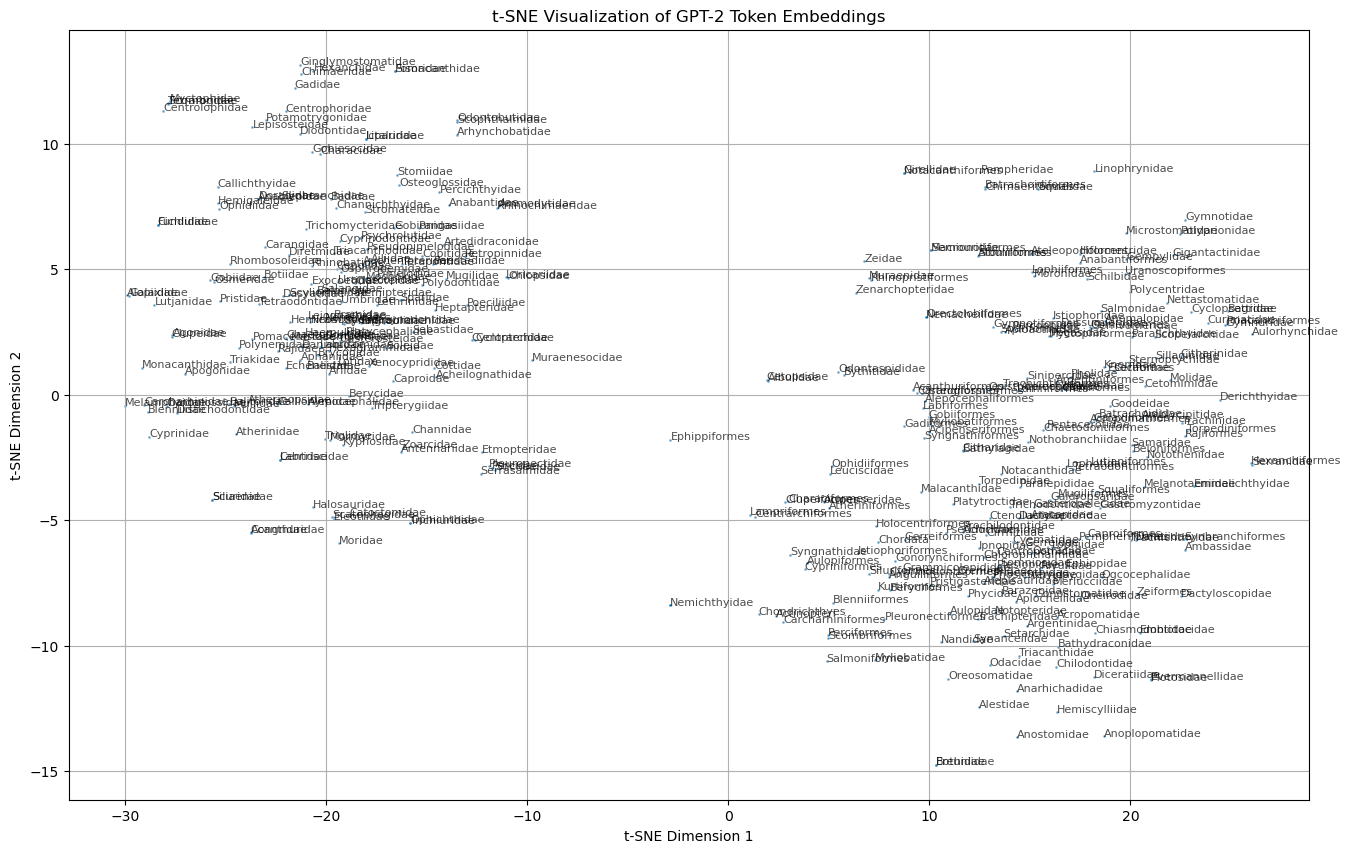

In [63]:
# Get the embeddings from the embedding layer
embeddings = model.get_input_embeddings().weight.data.cpu().numpy()

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings)

# Get the vocabulary and create an index-to-token mapping
vocab = tokenizer.get_vocab()
index_to_token = {v: k for k, v in vocab.items()}

# Plot the t-SNE embeddings
plt.figure(figsize=(16, 10))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], s=1, alpha=0.5)

# Annotate tokens
for idx, (x, y) in enumerate(embeddings_tsne):
    token = index_to_token.get(idx, None)
    if token:
        if idx < 1000 or idx in [vocab['Chordata'], vocab['Actinopteri'], vocab['Chondrichthyes']]:
            # Annotate the first 1000 tokens or specific important tokens
            plt.annotate(token, (x, y), fontsize=8, alpha=0.7)

# Add labels and title
plt.title(f"t-SNE Visualization of GPT-2 Token Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

In [82]:
order_family_dict = {}

for order in teleo['order'].unique():
    families = teleo.loc[teleo['order'] == order, 'family'].tolist()
    order_family_dict[order] = families

order_family_dict


{'Scombriformes': ['Gempylidae',
  'Trichiuridae',
  'Scombridae',
  'Centrolophidae',
  'Bramidae',
  'Nomeidae',
  'Stromateidae',
  'Chiasmodontidae'],
 'Salmoniformes': ['Salmonidae'],
 'Holocentriformes': ['Holocentridae'],
 'Cypriniformes': ['Gastromyzontidae',
  'Nemacheilidae',
  'Leuciscidae',
  'Xenocyprididae',
  'Cyprinidae',
  'Gobionidae',
  'Acheilognathidae',
  'Cobitidae',
  'Botiidae',
  'Catostomidae',
  'Danionidae',
  'Balitoridae'],
 'Istiophoriformes': ['Istiophoridae'],
 'Centrarchiformes': ['Girellidae',
  'Kyphosidae',
  'Percichthyidae',
  'Centrarchidae',
  'Terapontidae',
  'Cirrhitidae',
  'Sinipercidae'],
 'Perciformes': ['Nototheniidae',
  'Serranidae',
  'Liparidae',
  'Triglidae',
  'Agonidae',
  'Scorpaenidae',
  'Sebastidae',
  'Cyclopteridae',
  'Cottidae',
  'Zoarcidae',
  'Artedidraconidae',
  'Peristediidae',
  'Percidae',
  'Stichaeidae',
  'Tetrarogidae',
  'Psychrolutidae',
  'Hexagrammidae',
  'Gasterosteidae',
  'Platycephalidae',
  'Channic

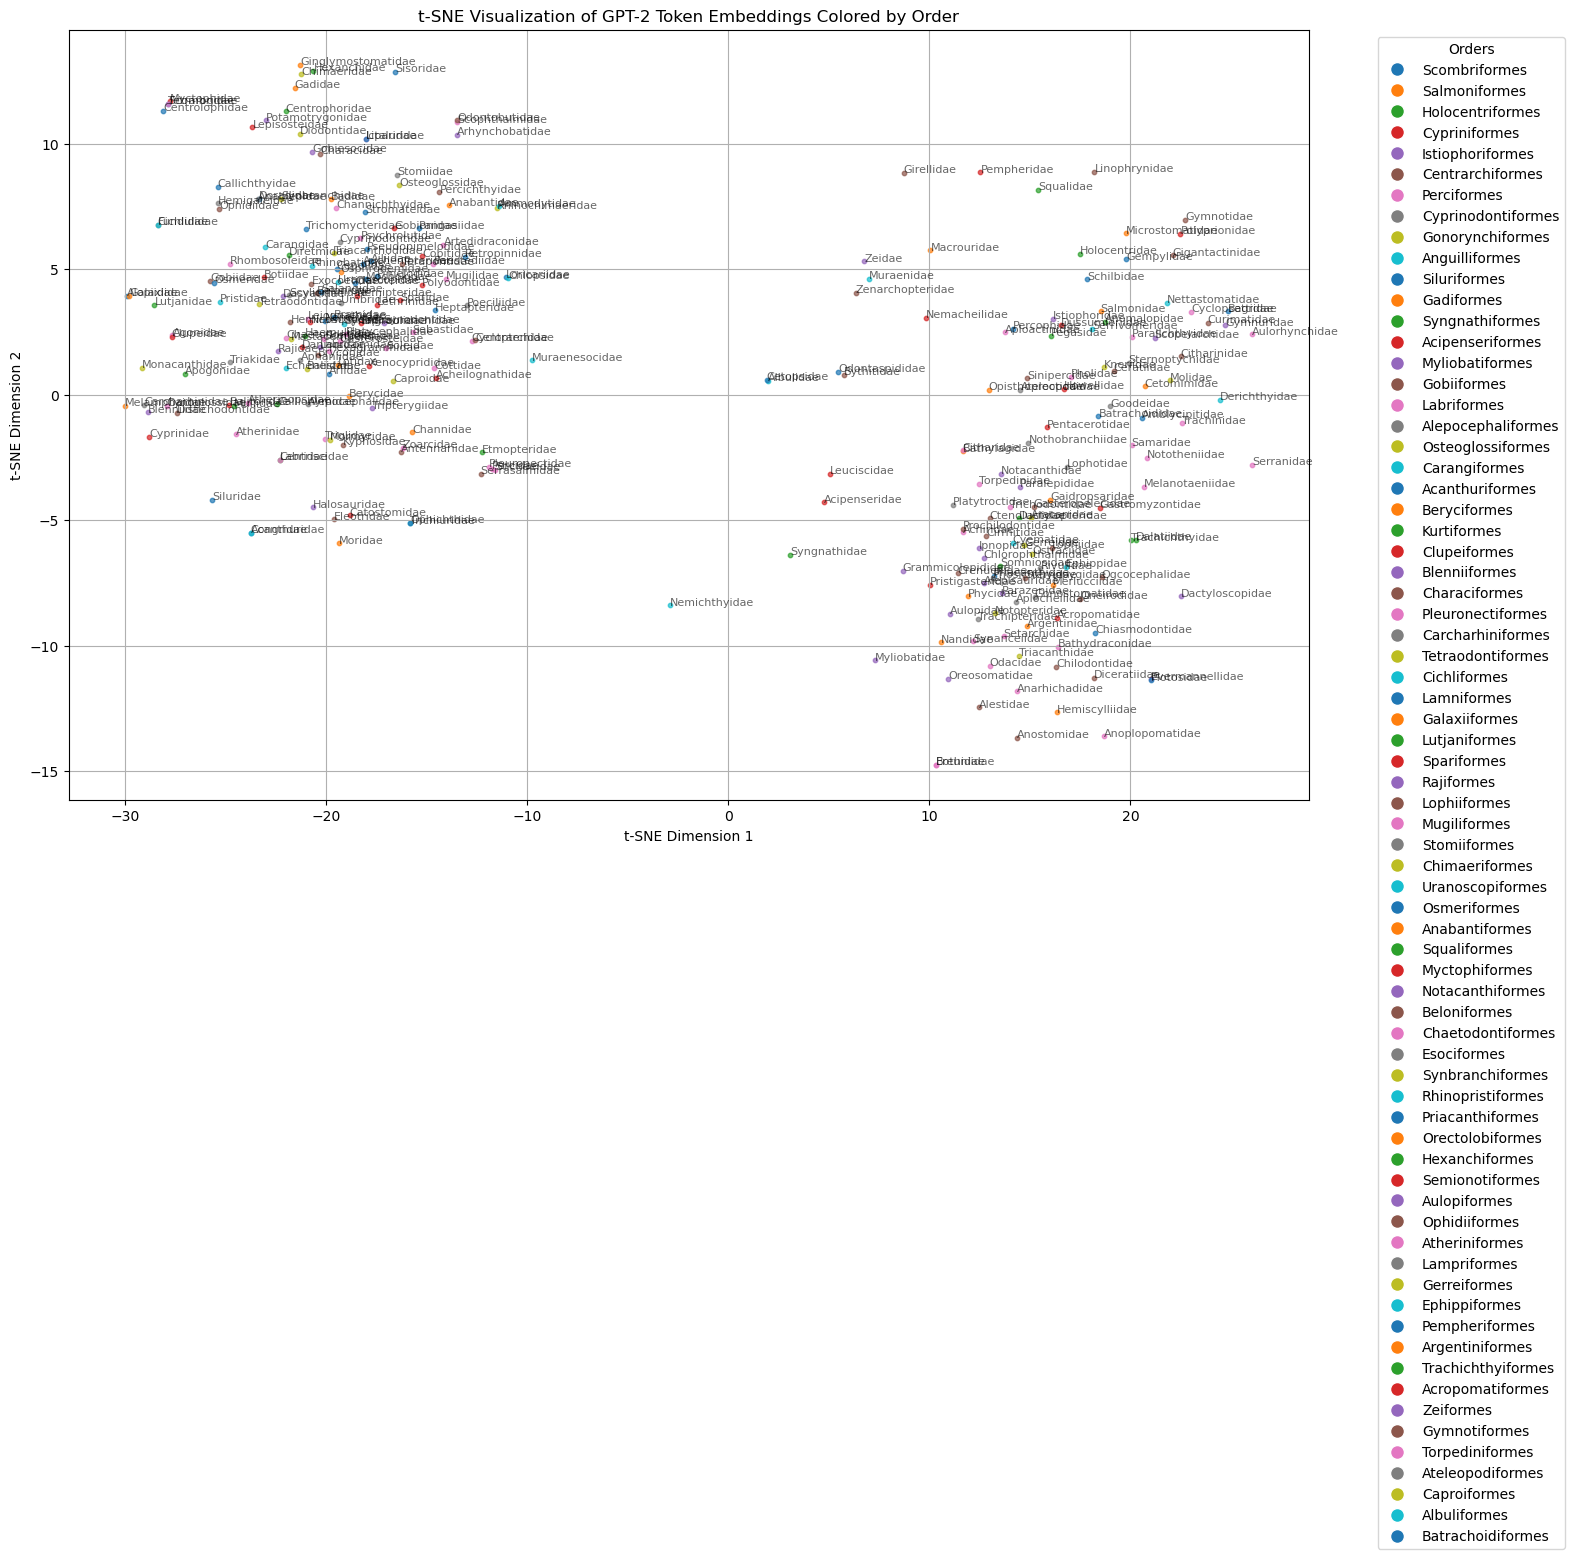

In [84]:
import matplotlib.colors as mcolors

# Flatten the list of families from order_family_dict
all_families = {family for families in order_family_dict.values() for family in families}


# Get the embeddings from the embedding layer
embeddings = model.get_input_embeddings().weight.data.cpu().numpy()

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings)

# Get the vocabulary and create an index-to-token mapping
vocab = tokenizer.get_vocab()
index_to_token = {v: k for k, v in vocab.items()}

# Filter tokens to include only those in the family list
filtered_indices = [idx for idx, token in index_to_token.items() if token in all_families]
filtered_embeddings_tsne = embeddings_tsne[filtered_indices]
filtered_tokens = [index_to_token[idx] for idx in filtered_indices]

# Assign colors to orders
orders = list(order_family_dict.keys())
colors = list(mcolors.TABLEAU_COLORS.values())
order_colors = {order: colors[i % len(colors)] for i, order in enumerate(orders)}

# Create a mapping of families to orders
family_to_order = {family: order for order, families in order_family_dict.items() for family in families}

# Plot the t-SNE embeddings with colors based on order
plt.figure(figsize=(16, 10))

for idx, (x, y) in zip(filtered_indices, filtered_embeddings_tsne):
    token = index_to_token.get(idx, None)
    if token:
        # Determine the order of the family token
        order = family_to_order.get(token, None)
        color = order_colors.get(order, 'grey')  # Default to grey if not found

        # Plot the point
        plt.scatter(x, y, s=10, color=color, alpha=0.7)

        # Annotate key tokens for clarity
        plt.annotate(token, (x, y), fontsize=8, alpha=0.6)

# Create a legend for the orders
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
           for order, color in order_colors.items()]
labels = list(order_colors.keys())
plt.legend(handles, labels, title='Orders', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and title
plt.title(f"t-SNE Visualization of GPT-2 Token Embeddings Colored by Order")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

In [80]:
import plotly.express as px

In [85]:
# Get the embeddings from the embedding layer
embeddings = model.get_input_embeddings().weight.data.cpu().numpy()

# Apply t-SNE to reduce dimensionality to 3D
tsne = TSNE(n_components=3, random_state=42)
embeddings_tsne_3d = tsne.fit_transform(embeddings)

# Get the vocabulary and create an index-to-token mapping
vocab = tokenizer.get_vocab()
index_to_token = {v: k for k, v in vocab.items()}

# Filter tokens to include only those in the family list
filtered_indices = [idx for idx, token in index_to_token.items() if token in all_families]
filtered_embeddings_tsne_3d = embeddings_tsne_3d[filtered_indices]
filtered_tokens = [index_to_token[idx] for idx in filtered_indices]

# Create a DataFrame for Plotly
data = {
    'x': filtered_embeddings_tsne_3d[:, 0],
    'y': filtered_embeddings_tsne_3d[:, 1],
    'z': filtered_embeddings_tsne_3d[:, 2],
    'token': filtered_tokens,
    'order': [family_to_order[token] for token in filtered_tokens]
}
df = pd.DataFrame(data)

# Plot using Plotly
fig = px.scatter_3d(
    df,
    x='x', y='y', z='z',
    color='order',
    hover_name='token',
    title='3D t-SNE Visualization of GPT-2 Token Embeddings Colored by Order'
)

# Show the plot
fig.show()